<a href="https://colab.research.google.com/github/Gautam0507/MAT496-Introduction-to-LLMs/blob/main/Appendix-A/Appendix_A_Introduction_to_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1.3 Installing Pytorch

Making sure torch, torchaudio and torchvision is installed.

Remove and run the command for the runtime selected

In [ ]:
%%capture
# Comment %%capture if there are install errors
# CPU Install
# !pip3 install torch==2.4.0 torchvision torchaudio
# GPU install
!pip3 install torch==2.4.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
import torch
torch.cuda.is_available()

True

## Inatalling Other libraries for the notebook to work

In [ ]:
%%capture
!pip install numpy matplotlib

# A.2 Understanding Tensors
Tensors are containers to store multidimensional data

## A.2.1 Scalars, Vecotrs, Matrices and Tensors

In [ ]:
tensor0d = torch.tensor(1)

tensor1d = torch.tensor([1, 2, 3])

tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor3d = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

## A.2.2 Tensor Data Types

Default tensor datatype is `int64`

`.dtype` attribute gives type

In [ ]:
print(tensor1d.dtype)

torch.int64


The default float precision is 32 bits

Most  GPU architectures are optimized for 32 bit operations

In [ ]:
tensorfloat = torch.tensor([1, 2, 3], dtype=torch.float)
print(tensorfloat.dtype)

torch.float32


Converting tensor datatypes

In [ ]:
floattensor = tensor1d.to(torch.float)
print(floattensor.dtype)

torch.float32


## A.2.3 Common PyTorch tensor operations

Most operations return the value as a copy and do not change them in place.

Creating a tensor

In [ ]:
tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor2d)

tensor([[1, 2, 3],
        [4, 5, 6]])


Getting the dimensions of a tensor using `.shape` attribute

In [ ]:
print(tensor2d.shape)

torch.Size([2, 3])


Resize the tensor to wanted dimensions using `tensor.reshape()` or `tensor.view()` functions

- `view()` only works when the memory is contiguous
- The total elements must match for reshape to work i.e `reshape(3,1)` has only 3 elements and thus returns an error

In [ ]:
print("Tensor using reshape")
print(tensor2d.reshape(3,2))
print("Tensor using view")
print(tensor2d.view(1,6))

Tensor using reshape
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Tensor using view
tensor([[1, 2, 3, 4, 5, 6]])


Matrix Transpose using `tensor.T`

In [ ]:
print(tensor2d.T)

tensor([[1, 4],
        [2, 5],
        [3, 6]])


Matrix multipilication using `matmul()` function

A * B = `A.matmul(B)` given the dimensions align

Can also be done using `A @ B`

In [ ]:
print("Using matmul function")
print(tensor2d.matmul(tensor2d.T))
print("Using @ operator")
print(tensor2d @ tensor2d.T)

Using matmul function
tensor([[14, 32],
        [32, 77]])
Using @ operator
tensor([[14, 32],
        [32, 77]])


# A.3 Seeing Models as Computation Graphs

PyTorch's automatic differentiation engine - PyTorch's autograd

A computation graph is a directed graph that allows us to express and visualisze mathematical expresions.
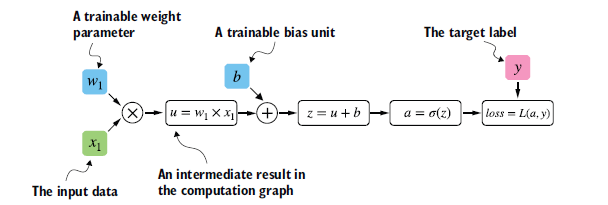


### Forward pass of Logistic regression

In [ ]:
import torch.nn.functional as F

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b = torch.tensor([0.0])
z = x1 * w1 + b
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


The computational graph for the above is:

TODO: Figure out inserting photos here (Image A.7)

Pytorch builds something like this in the background

# A.4 Automatic differentiation made easy

Pytorch builds a computation graph by default if one of the nodes has the `requires_grad` attribute set to `True`

This is used in Backpropogation
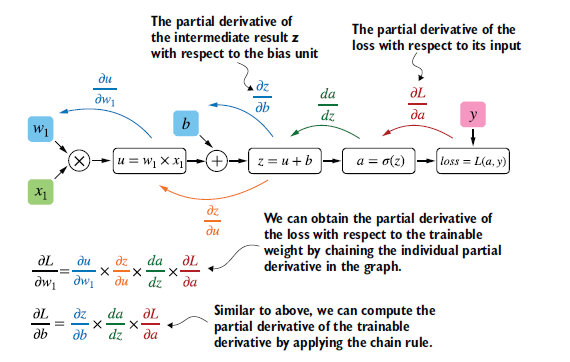

### Computing Gradients Via autograd

In [ ]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

#### Computing grdients manually

In [ ]:
grad_L_w1 = grad(loss, w1, retain_graph = True)
grad_L_b = grad(loss, b, retain_graph = True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


#### Computing gradients automatically (at a higher abstarction level)

`.backward()` function called on the loss automatically calulates the gradients of all leaf nodes in the computational graph and stores in the tensors `.grad` attributes

- it calculates these for tensors where `requires_grad` is enabled.

In [ ]:
loss.backward()
print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


# A.5 Impementing multilayer neural netowrks

A multilayer perceptron with two hidden layers.

- `torch.nn.Module` - base class that has a lot of the neural netowrk operations built in
- `__init__()` - the defines the the network layers
- `forward()` - the method specifies how the layers interact in the forward iteration
- `backward()` - method that is used during training to compute the gradients of the loos function given model parameters (usually not implemented)
- `torch.nn.Sequential`-
- `torch.nn.Linear()`-
- `torch.nn.ReLU()` - activation function between layers

In [ ]:
# Defining the Neural Network class
class NeuralNetwork(torch.nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()

    self.layers = torch.nn.Sequential(
        # First Hidden Layer
        torch.nn.Linear(num_inputs, 30),
        torch.nn.ReLU(),

        # Second Hidden Layer
        torch.nn.Linear(30, 20),
        torch.nn.ReLU(),

        # Output Layer
        torch.nn.Linear(20, num_outputs),
    )

  def forward(self, x):
    logits = self.layers(x)
    return logits

In [ ]:
model = NeuralNetwork(50, 3)
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [ ]:
# Question: What are the  parameters that does not have grad?
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters: ", num_params)

Total number of trainable model parameters:  2213


In [ ]:
print("Weights of the first layers")
print(model.layers[0].weight.shape)
print(model.layers[0].weight)
print("Biases of the first layer")
print(model.layers[0].bias.shape)
print(model.layers[0].bias)

Weights of the first layers
torch.Size([30, 50])
Parameter containing:
tensor([[-0.0278,  0.0257, -0.0797,  ..., -0.0664,  0.1040, -0.0665],
        [-0.0450, -0.1279, -0.1201,  ..., -0.0323, -0.0515,  0.0682],
        [-0.1313, -0.0507,  0.1229,  ...,  0.1269,  0.1258,  0.0209],
        ...,
        [ 0.0472, -0.0425,  0.0211,  ..., -0.0381,  0.0478, -0.0617],
        [-0.0382, -0.0881,  0.0621,  ..., -0.1191, -0.1093,  0.0630],
        [-0.0476, -0.1245, -0.0237,  ..., -0.0979, -0.0857, -0.0911]],
       requires_grad=True)
Biases of the first layer
torch.Size([30])
Parameter containing:
tensor([-0.1187,  0.1345, -0.0024,  0.1178,  0.0936,  0.0438,  0.1265, -0.0552,
         0.0103, -0.0005, -0.0394,  0.0738,  0.0928, -0.1338,  0.0335, -0.0199,
         0.0355,  0.0544,  0.1064, -0.1211,  0.0686, -0.0322,  0.0733, -0.0085,
         0.0320, -0.1322,  0.0558,  0.0370, -0.0939,  0.0740],
       requires_grad=True)


Reporducing outputs using `torch.manual_seed()`

In [ ]:
torch.manual_seed(123)
model = NeuralNetwork(50, 3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


Runing one forward pass

- One training example of length 50 is generated and passed into the model.
- Calling the model this way passes the data through the neural network and returns the values at the output layer
- the `grad_fn=<AddmmBackward0>` the last-used function to compute a variable in the computation graph. It is used by the model for computing gradients and during backpropogation. In this case it means matrix mutltipilication followed by addition. Its the function last used to compute values

In [ ]:
torch.manual_seed(123)
X = torch.rand((1,50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


When using the model for inference we use the `torch.no_grad()` to save on computational cost calculating gradients

In [ ]:
with torch.no_grad():
  out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


The loss functions in pytorch genearally ccombine softmax operation with the loss calculation for computational efficiency.

When we want to compute class membership probabilities for the last layer we have to call the softmax function explicitly

In [ ]:
with torch.no_grad():
  out = torch.softmax(model(X), dim = 1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


# A.6 Setting up Efficient data loaders

- Dataset class - defines the dataset and manages training and testing data
- Dataloader class - handles dataset shuffling, assembling dataset into batches and basically handles getting data ready for the model.  
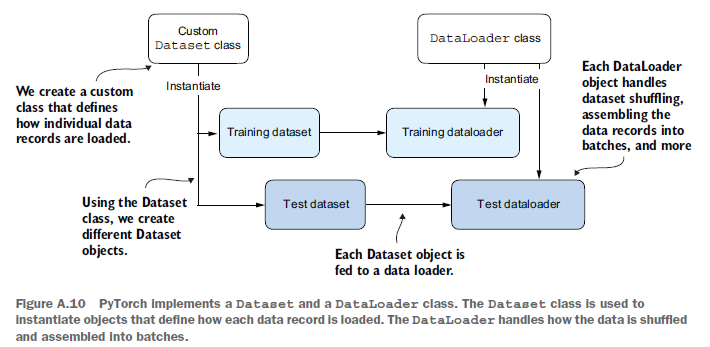

## Setting up a simple dataset

In [ ]:
X_train = torch.tensor([
[-1.2, 3.1],
[-0.9, 2.9],
[-0.5, 2.6],
[2.3, -1.1],
[2.7, -1.5]
])
Y_train = torch.tensor([0, 0, 0, 1, 1])
X_test = torch.tensor([
[-0.8, 2.8],
[2.6, -1.6],
])
Y_test = torch.tensor([0, 1])

## Dataset class
`torch.utils.data.Dataset` is the main class wihch is inherited to create the custom dataset
- `__init()__`
- `__getitem__(self,index)` - tihs function defines how to handle exactly one datarecord and the corresponding label
- `__len__(self)` - The function returns the total length of the dataset  

In [ ]:
from torch.utils.data import Dataset

class ToyDataset(Dataset):
  def __init__(self, X, Y):
    self.features = X
    self.labels = Y

  def __getitem__(self, index):
    one_X = self.features[index]
    one_Y = self.labels[index]
    return one_X, one_Y

  def __len__(self):
    return self.labels.shape[0]

In [ ]:
train_ds = ToyDataset(X_train, Y_train)
test_ds = ToyDataset(X_test, Y_test)

## DataLoader Class
This class takes the dataset iterates thorugh it organizes it into batches using a random number generator and organizing them into input and output for the model

Here the seed is set to reproduce outputs but in general **batching the data randomly is desired** when training to prevent neural networks from getting caught in repetitive update cycles

- `dataset` -  pass in an instance of the `Dataset` class
- `batch_size` - the number of training samples per batch
- `shuffle` - set  to `True` for training dataset and `False` for testing  
- `num_workers` - no of CPU workers woring on loading the data. Higher number means more paralell but does depend on the data. (Mostly does not work on jupyter notebooks or small datasets)
- `drop_last` - if the number of records in the dataset and the `batch_size` does not match like in the case below having one batch with less elements can cause issues with convergence during training. Should generally be set to `True`

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 2,
    shuffle = True,
    num_workers=0,
    drop_last = True
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

Checking outputs

In [ ]:
print("Training dataset after the loader")
for idx, (x,y) in enumerate(train_loader):
  print(f"Batch {idx+1}:", x,y)

print()
print("Testing dataset after the loader")
for idx, (x,y) in enumerate(test_loader):
  print(f"Batch {idx+1}:", x,y)

Training dataset after the loader
Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])

Testing dataset after the loader
Batch 1: tensor([[-0.8000,  2.8000],
        [ 2.6000, -1.6000]]) tensor([0, 1])


# A.7 A typical Training Loop
## Training a nerual network on the above toy dataset

- `torch.optim.SGD()` - stochastic gradient descenet optimizer
- one epoch is one run of the entire training set thorugh the model
- the learning rate is a hyperparameter that must be tuned with experimentation such that it converges after a certain number of epochs
- `model.train()` - tunes settings and sets the model to training mode
- `model.eval()` - tunes the model for evaluation such as not calculating backpropogation gradients
- `optimizer.zero_grad()` - should be set each round of updates so that the gradients dont accumulate

In [ ]:
import torch.nn.functional as F

torch.manual_seed(123)

model = NeuralNetwork(num_inputs = 2,num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.5)
num_epochs = 3

for epoch in range(num_epochs):
  model.train()
  for batch_idx, (features, labels) in enumerate(train_loader):
    logits = model(features)
    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # LOGGING
    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"\
          f" | Batch {batch_idx:03d}/{len(train_loader):03d} "
          f" | Train Loss: {loss:.2f}")

  model.eval()

Epoch: 001/003 | Batch 000/002  | Train Loss: 0.75
Epoch: 001/003 | Batch 001/002  | Train Loss: 0.65
Epoch: 002/003 | Batch 000/002  | Train Loss: 0.44
Epoch: 002/003 | Batch 001/002  | Train Loss: 0.13
Epoch: 003/003 | Batch 000/002  | Train Loss: 0.03
Epoch: 003/003 | Batch 001/002  | Train Loss: 0.00


## Using the above model to make predictions

In [ ]:
model.eval()
with torch.no_grad():
  outputs = model(X_train)
print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


### Getting class membership probabilites
The first input in the set `X_train` has a $99\%$ probability to be output class 1 and a $1\%$ probability to be in class 2

In [ ]:
torch.set_printoptions(sci_mode = False)
probs = torch.softmax(outputs, dim=1)
print(probs)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])


coverting probabilities to class label predictions
- The first 3 training data belongs to class 1 and the last 2 belongs to class 2

In [ ]:
predictions = torch.argmax(probs, dim = 1)
print(predictions)

tensor([0, 0, 0, 1, 1])


The model has predicted correctly and fit the training data

In [ ]:
print(predictions == Y_train)
print(f"The total number of correct predictions based on the training set: {torch.sum(predictions ==  Y_train)}")

tensor([True, True, True, True, True])
The total number of correct predictions based on the training set: 5


### Generalizing the computation of prediction accuracy
The function is useful for loading the model with batch sizes and getting the accuracy as the entire dataset cannot be loaded and evaluated at te same time

In [ ]:
def compute_accuracy(model, dataloader):

  model = model.eval()
  correct = 0.0
  total_examples = 0

  for idx, (features, labels) in enumerate(dataloader):

    with torch.no_grad():
      logits = model(features)

    predictions = torch.argmax(logits, dim = 1)
    compare = labels == predictions
    correct += torch.sum(compare)
    total_examples += len(compare)

  return (correct/total_examples).item()

In [ ]:
print(f"Training accuracy: {compute_accuracy(model, train_loader)}")
print(f"Test accuracy: {compute_accuracy(model, test_loader)}")

Training accuracy: 1.0
Test accuracy: 1.0


# A.8 Saving and Loading Models
- `model.state_dict()` - dictionary that maps each layer in teh model to its trainable paramenters
- `model.pth` or `model.pt` - common file conventions for saving models

In [ ]:
torch.save(model.state_dict(), "model.pth")

Restoring Model from disk
- Note: The model architecture must match exactly to where it was trained when saving and loading

In [ ]:
model = NeuralNetwork(num_inputs = 2,num_outputs=2)
model.load_state_dict(torch.load("model.pth"))

<ipython-input-38-a3aba5c745d0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

# A.9 Optimizing performance using GPU


- Pytorch devices refer to where the tensors are stored and where computations occur. This can be either the CPU or the GPU
- All tensors must be on the same decive during a computation

- `torch.cuda.is_availabe()` - returns if torch can access GPU or not

In [ ]:
print(torch.cuda.is_available())

True


CPU Computation

In [ ]:
tensor_1 = torch.tensor([1., 2., 3.])
tensor_2 = torch.tensor([4., 5., 6.])
print(tensor_1 + tensor_2)

tensor([5., 7., 9.])


Moving the tensors to GPU

The `device='cuda:0'` in the output says that the computations happened on the GPU

In [ ]:
tensor_1 = tensor_1.to("cuda")
tensor_2 = tensor_2.to("cuda")
print(tensor_1+ tensor_2)


tensor([5., 7., 9.], device='cuda:0')


## Training a Neural Network on the GPU

In [ ]:
import torch.nn.functional as F

torch.manual_seed(123)

model = NeuralNetwork(num_inputs = 2,num_outputs=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.5)
num_epochs = 3

for epoch in range(num_epochs):
  model.train()
  for batch_idx, (features, labels) in enumerate(train_loader):
    features, labels = features.to(device), labels.to(device)
    logits = model(features)
    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # LOGGING
    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"\
          f" | Batch {batch_idx:03d}/{len(train_loader):03d} "
          f" | Train Loss: {loss:.2f}")

  model.eval()

Epoch: 001/003 | Batch 000/002  | Train Loss: 0.75
Epoch: 001/003 | Batch 001/002  | Train Loss: 0.65
Epoch: 002/003 | Batch 000/002  | Train Loss: 0.44
Epoch: 002/003 | Batch 001/002  | Train Loss: 0.13
Epoch: 003/003 | Batch 000/002  | Train Loss: 0.03
Epoch: 003/003 | Batch 001/002  | Train Loss: 0.00


# TODO: Figure out distrubuted training on multiple GPU (Find the runtime for this )
